In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Cout of data types
df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleansing

In [7]:
# Change the data type from Integer to object
df['MSSubClass']=df['MSSubClass'].astype('object')

In [8]:
#List of columns with value 0
zero_cols=df.columns[df.eq(0).any()]
zero_cols

Index(['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [9]:
# Replace 0 with null value
df[zero_cols]=df[zero_cols].replace(0,np.NaN )

### Derive Age from YearBuilt



In [10]:
df['Age']=2022-df['YearBuilt']
df[['YearBuilt','Age']].head()

,YearBuilt,Age
0,2003,19
1,1976,46
2,2001,21
3,1915,107
4,2000,22


## Missing Value Treatment

In [11]:
#Percentage of missing values
round((df[df.columns[df.isnull().any()]].isnull().sum()/len(df))*100,2).sort_values(ascending=False)

PoolQC           99.52
PoolArea         99.52
3SsnPorch        98.36
LowQualFinSF     98.22
MiscVal          96.44
MiscFeature      96.30
BsmtHalfBath     94.38
Alley            93.77
ScreenPorch      92.05
BsmtFinSF2       88.56
EnclosedPorch    85.75
Fence            80.75
HalfBath         62.53
MasVnrType       59.73
MasVnrArea       59.52
BsmtFullBath     58.63
2ndFlrSF         56.78
WoodDeckSF       52.12
FireplaceQu      47.26
Fireplaces       47.26
OpenPorchSF      44.93
BsmtFinSF1       31.99
LotFrontage      17.74
BsmtUnfSF         8.08
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        5.55
GarageArea        5.55
GarageQual        5.55
GarageCond        5.55
GarageType        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
TotalBsmtSF       2.53
BsmtFinType1      2.53
BsmtCond          2.53
FullBath          0.62
BedroomAbvGr      0.41
KitchenAbvGr      0.07
Electrical        0.07
dtype: float64

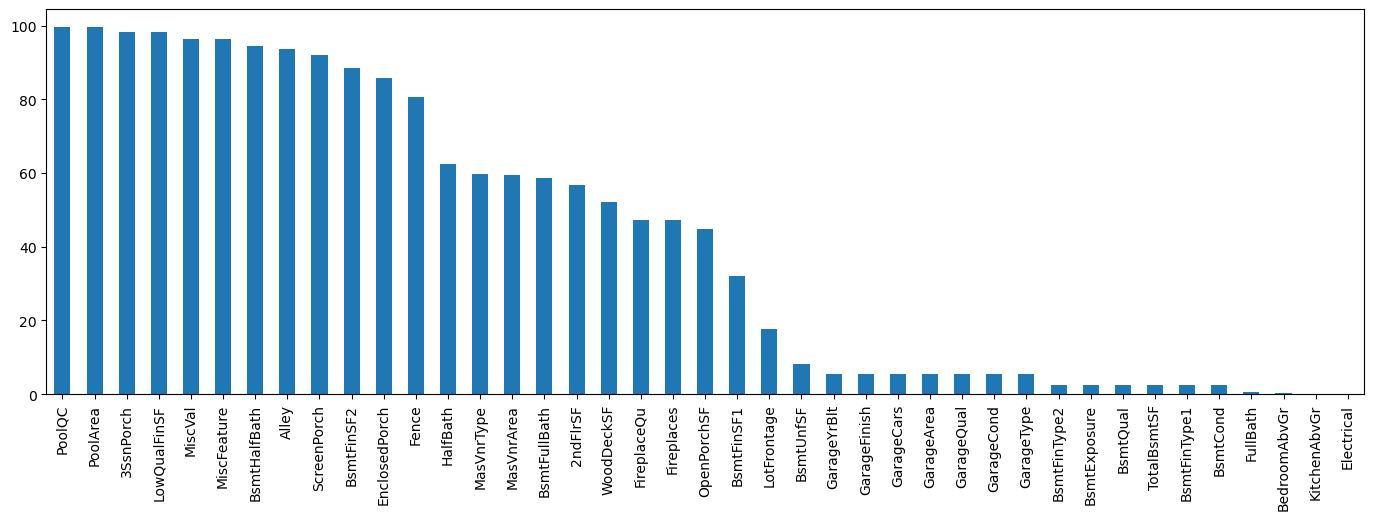

In [12]:
# Barplot for Percentages of missing values
plt.figure(figsize=[17,5])
round((df[df.columns[df.isnull().any()]].isnull().sum()/len(df))*100,2).sort_values(ascending=False).plot.bar()
plt.show()

Observations:

-There are few columns with missing values more than 30%. Therefore, drop null values by columns.
-LotFrontage null values can be imputed with median.
-Garage columns has same percentage of missing values. Therefore, drop null values by rows.
-Basement columns has same percentage of missing values. Therefore, drop null values by rows.
-Masonry columns has same percentage of missing values. Therefore, drop null values by rows.

#### Drop columns having missing values >30%



In [13]:
# List of columns with missing values >30%
miss_cols=df.columns[(df.isnull().sum()/len(df)*100>30)]
miss_cols

Index(['Alley', 'MasVnrType', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
       'Fireplaces', 'FireplaceQu', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal'],
      dtype='object')

In [14]:
#Drop columns with missing values >40%
df.drop(miss_cols,axis=1, inplace=True)
df.shape

(1460, 60)

In [15]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

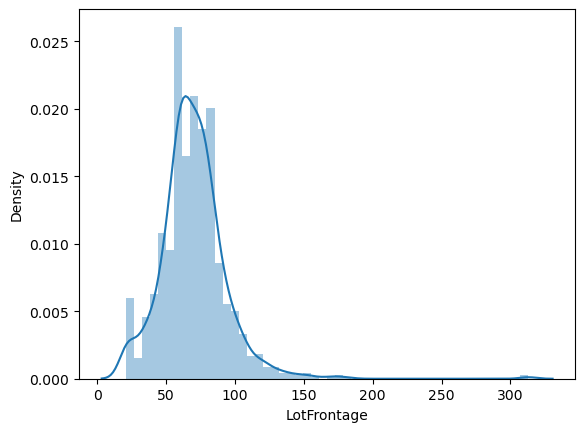

In [16]:
# Plot distribution
sns.distplot(df['LotFrontage'])
plt.show()

In [18]:
garage_cols=['GarageYrBlt','GarageType','GarageFinish','GarageQual','GarageCond']
garage_cols

['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [19]:
df[df['GarageYrBlt'].isnull()][garage_cols]

,GarageYrBlt,GarageType,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


In [20]:
# Drop null values by rows
df.dropna(subset=garage_cols, inplace=True)

In [21]:
df.shape

(1379, 60)

#### Basement Columns



In [22]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'FullBath',
       'BedroomAbvGr'],
      dtype='object')

In [23]:
basement_cols=['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2','BsmtUnfSF']
basement_cols

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtUnfSF']

In [24]:
# Drop null values by rows
df.dropna(subset=basement_cols, inplace=True)

In [25]:
df.shape

(1274, 60)

#### Other columns



In [26]:
other_cols=df.columns[df.isnull().any()]
other_cols

Index(['LotFrontage', 'Electrical', 'FullBath', 'BedroomAbvGr'], dtype='object')

In [27]:
# Drop null values by rows
df.dropna(subset=other_cols, inplace=True)

In [28]:
df.shape

(1042, 60)

In [29]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [30]:
#Verify missing value treatment
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond  

## Data Visualization

In [31]:
# Create categorical variable list
cat_cols=df.select_dtypes('object').columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [32]:
len(cat_cols)

38

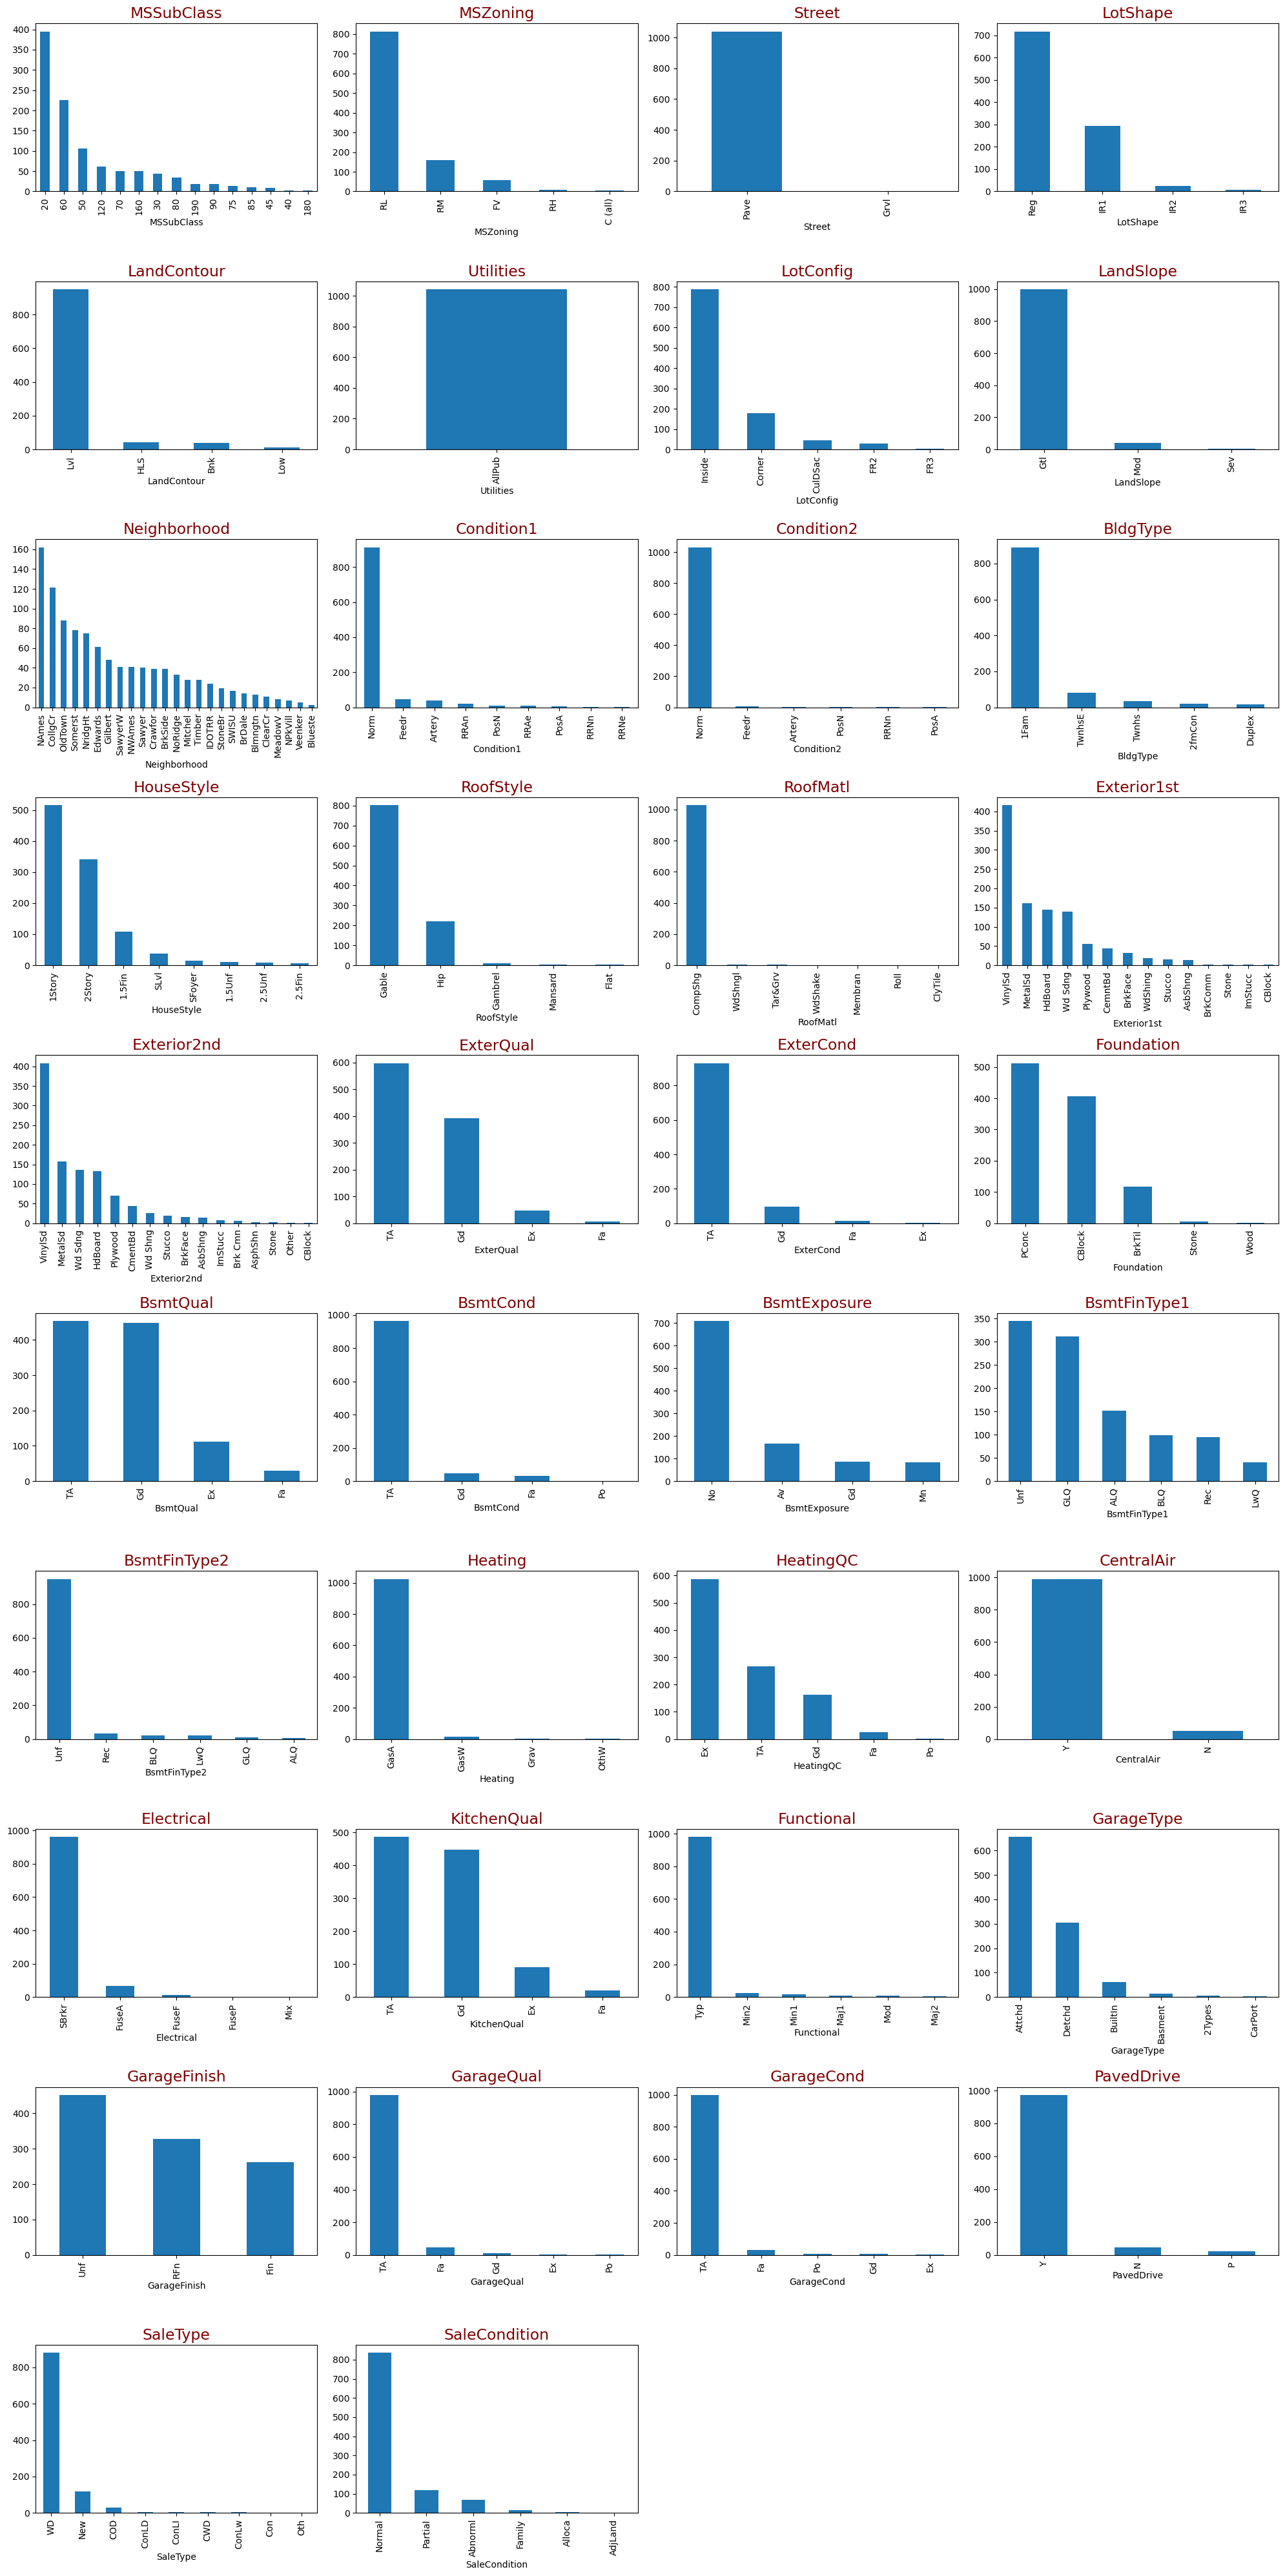

In [33]:
# Bar plot of all categorical variables by count
fig=plt.figure(figsize=[20,40])
for i,col in enumerate(cat_cols):
    plt.subplot(10,4,i+1)
    df[col].value_counts().plot.bar()
    plt.title(col,color='maroon', fontsize=17)
    fig.tight_layout()

In [34]:
#Create numerical variable list
num_cols=df.select_dtypes('number').columns
num_cols

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold',
       'SalePrice', 'Age'],
      dtype='object')

In [35]:
len(num_cols)

22

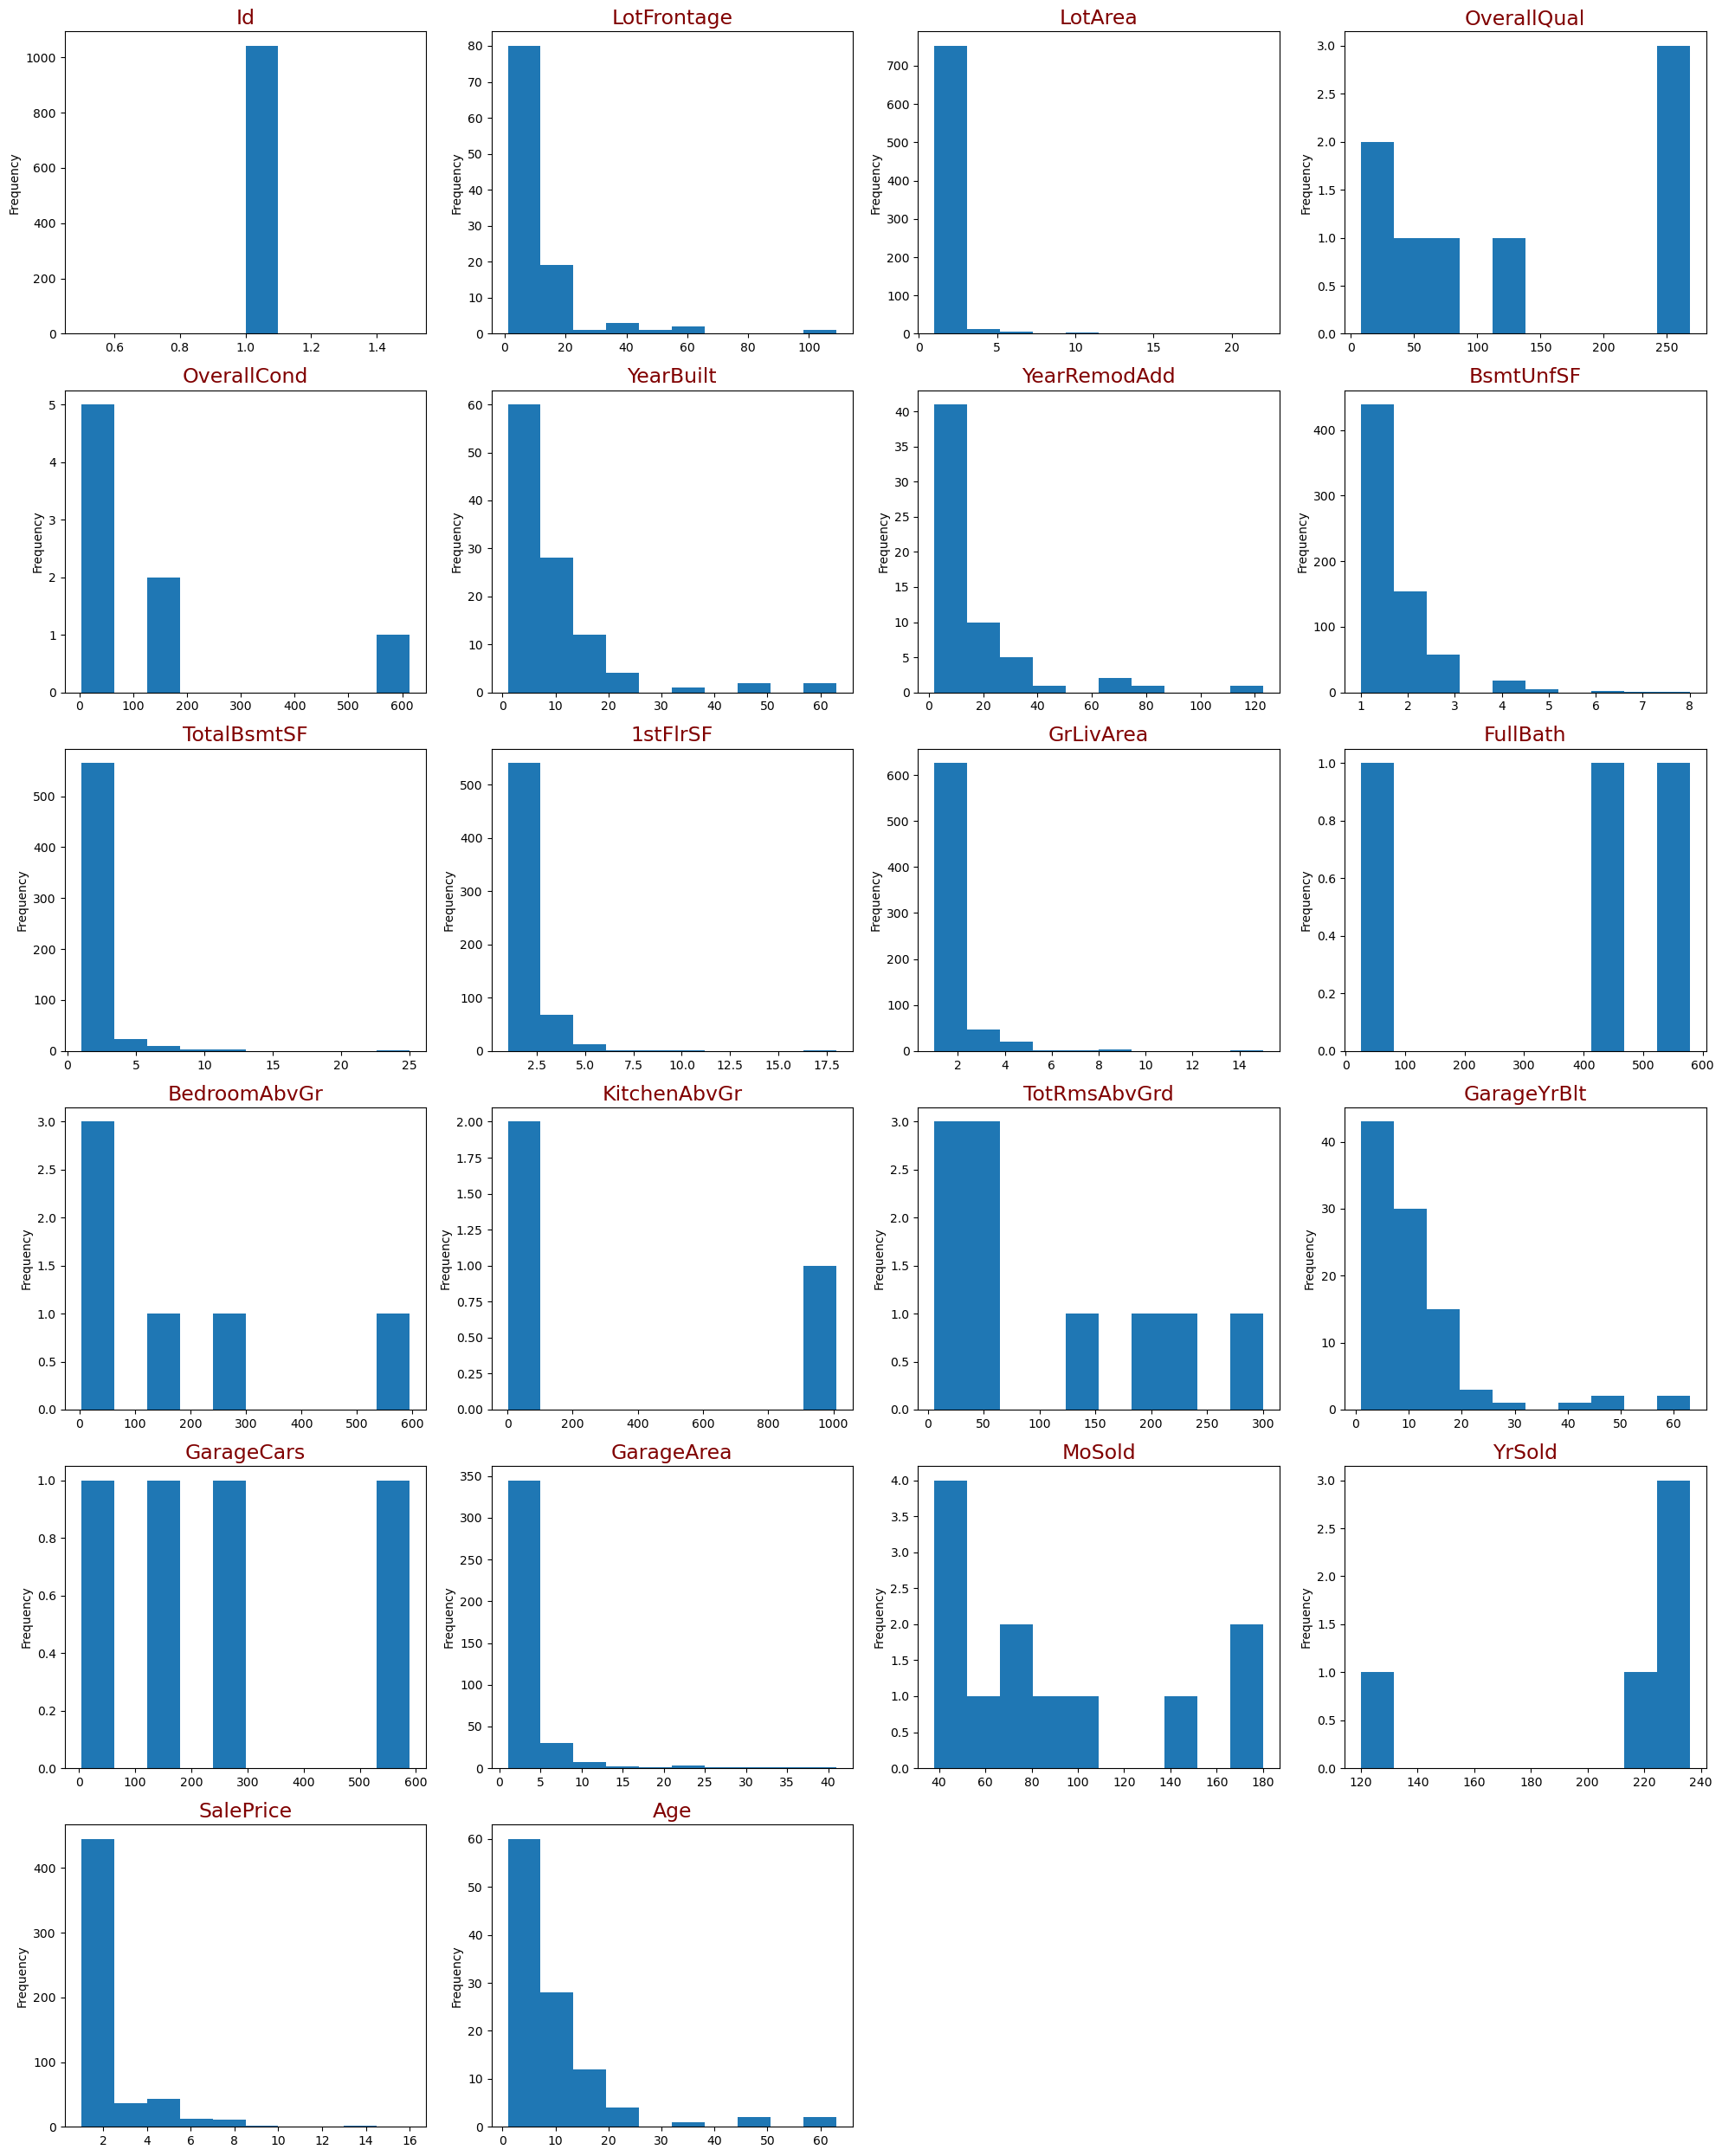

In [36]:
#Distribution of all numerical variables
fig=plt.figure(figsize=[20,25])
for i,col in enumerate(num_cols):
    plt.subplot(6,4,i+1)
    df[col].value_counts().plot.hist()
    plt.title(col,color='maroon', fontsize=17)
    fig.tight_layout()

### Correlation Matrix of numerical variables



In [37]:
df[num_cols].corr()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice,Age
Id,1.000000,-0.007940,-0.033013,-0.046444,0.008614,-0.016733,-0.027751,-0.024125,-0.016954,0.000765,...,0.030580,0.014692,0.005578,0.004614,-0.000259,-0.006468,0.016718,0.006999,-0.038541,0.016733
LotFrontage,-0.007940,1.000000,0.419574,0.244081,-0.053071,0.114020,0.087024,0.104934,0.413957,0.460235,...,0.271058,0.010248,0.355456,0.069023,0.283453,0.358758,0.023424,0.010880,0.347702,-0.114020
LotArea,-0.033013,0.419574,1.000000,0.164514,-0.029989,0.029487,0.028160,0.007125,0.320734,0.329860,...,0.157623,-0.009958,0.250593,0.012417,0.166659,0.205292,0.005379,0.004045,0.296084,-0.029487
OverallQual,-0.046444,0.244081,0.164514,1.000000,-0.207242,0.595115,0.565019,0.275999,0.542860,0.524635,...,0.078729,-0.142888,0.462753,0.564390,0.608915,0.562881,0.080775,0.001463,0.794710,-0.595115
OverallCond,0.008614,-0.053071,-0.029989,-0.207242,1.000000,-0.441103,0.014632,-0.174310,-0.249897,-0.171517,...,-0.007508,-0.060997,-0.099756,-0.358529,-0.280321,-0.245072,-0.004878,0.042263,-0.144391,0.441103
YearBuilt,-0.016733,0.114020,0.029487,0.595115,-0.441103,1.000000,0.630781,0.155286,0.421582,0.308410,...,-0.077876,-0.204901,0.115753,0.826859,0.533151,0.472697,0.014181,0.005645,0.521477,-1.000000
YearRemodAdd,-0.027751,0.087024,0.028160,0.565019,0.014632,0.630781,1.000000,0.163993,0.292592,0.282795,...,-0.092795,-0.173656,0.178489,0.647625,0.471017,0.415914,0.033561,0.036639,0.516293,-0.630781
BsmtUnfSF,-0.024125,0.104934,0.007125,0.275999,-0.174310,0.155286,0.163993,1.000000,0.352470,0.324203,...,0.126939,0.075590,0.202482,0.185995,0.266817,0.231392,0.021214,-0.019712,0.167052,-0.155286
TotalBsmtSF,-0.016954,0.413957,0.320734,0.542860,-0.249897,0.421582,0.292592,0.352470,1.000000,0.913472,...,0.034360,0.018377,0.312775,0.354055,0.486687,0.549591,-0.008128,0.010797,0.611629,-0.421582
1stFlrSF,0.000765,0.460235,0.329860,0.524635,-0.171517,0.308410,0.282795,0.324203,0.913472,1.000000,...,0.094501,0.053447,0.396169,0.280303,0.471071,0.530678,0.018843,0.010305,0.614449,-0.308410


### Heatmap of numerical variables correlation

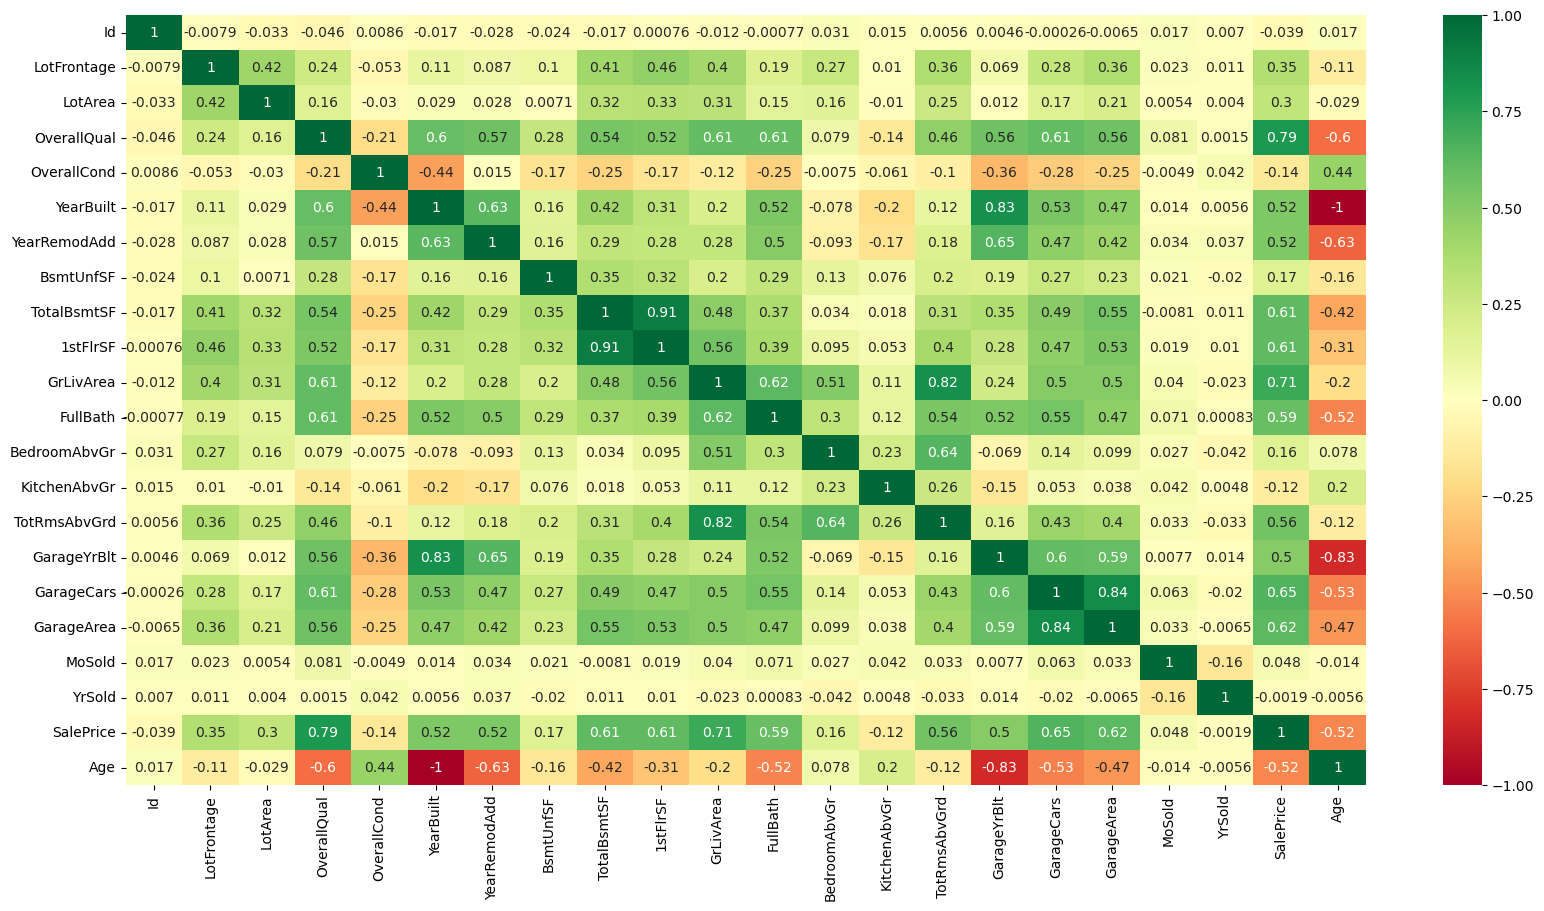

In [39]:
plt.figure(figsize=[20,10])
sns.heatmap(df[num_cols].corr(), annot=True, cmap='RdYlGn')
plt.show()

Observation: Following pairs are highly correlated
1)GarageArea and GarageCars
2)TotRmsAbvGr and GrLiveArea
3)SalesPrice and OverallQual
4)SalesPrice and GrLiveArea


## Data Preparation

In [41]:
#Drop Date, Year and Month columns as dataset may suffer high dimensionality problem if we create dummies of these columns
date_cols=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold']
date_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']

In [42]:
# Drop year and month columns
df.drop(date_cols,axis=1, inplace=True)
df.shape

(1042, 55)

In [43]:
#Create a list of categorical variables
cat_cols=df.select_dtypes('object').columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [44]:
# New dataframe of dummies
df_dum=pd.get_dummies(df[cat_cols],drop_first=True)

In [45]:
df_dum.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [46]:
df_dum.shape

(1042, 196)

In [47]:
df=pd.concat([df,df_dum], axis=1)
df.shape

(1042, 251)

In [48]:
# Drop original columns of categorical variables
df.drop(cat_cols, axis=1, inplace=True)
df.shape

(1042, 213)

In [49]:
# Drop id column as it is not a significant predictor
df.drop('Id', axis=1, inplace=True)
df.shape

(1042, 212)

#### Split data frame into train and test sets


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
#Split train and test sets in 70:30 ratio
df_train, df_test=train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [52]:
#Verify train, test size
print('Train shape', df_train.shape)
print('Test shape', df_test.shape)

Train shape (729, 212)
Test shape (313, 212)


##### Rescaling Numerical Variables


In [53]:
#Create numerical variables list
num_cols=df.select_dtypes(exclude='uint8').columns
num_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=212)

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler=MinMaxScaler()

In [56]:
# Fit and transform scaler on train set
# Transform scaler on test set
df_train[num_cols]=scaler.fit_transform(df_train[num_cols])
df_test[num_cols]=scaler.transform(df_test[num_cols])

In [57]:
#Verify train set scaled variables
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
906,0.325342,0.192661,0.714286,0.428571,0.733745,0.252789,0.273937,0.200718,0.5,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
772,0.250000,0.101618,0.428571,0.428571,0.221168,0.153872,0.150630,0.097167,0.0,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
881,0.078767,0.196779,0.571429,0.428571,0.113906,0.175021,0.167261,0.216879,0.5,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1225,0.150685,0.144288,0.428571,0.857143,0.031799,0.080433,0.155619,0.101357,0.0,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
295,0.054795,0.103509,0.428571,0.571429,0.080683,0.149542,0.123545,0.074421,0.0,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [58]:
#Verify test set scaled variables
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
579,0.205479,0.171014,0.285714,0.428571,0.491694,0.157369,0.134711,0.232442,0.5,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
282,0.044521,0.057459,0.571429,0.428571,0.187945,0.201332,0.197434,0.136472,0.5,0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1317,0.089041,0.044112,0.571429,0.428571,0.635026,0.207660,0.206462,0.144054,0.5,0.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
219,0.075342,0.024563,0.571429,0.428571,0.578073,0.190341,0.181753,0.123304,0.5,0.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
844,0.270548,0.179266,0.285714,0.857143,0.409112,0.128393,0.093371,0.156824,0.0,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### Divide train set into X and Y sets


In [59]:
#Create train set SalePrice as target(y) variable and rest of them as predictor(x) variables
y_train=df_train.pop('SalePrice')
x_train=df_train

In [60]:
print('y_train shape', y_train.shape)
print('x_train shape', x_train.shape)

y_train shape (729,)
x_train shape (729, 211)


In [61]:
#Create test set SalePrice as target(y) variable and rest of them as predictor(x) variables
y_test=df_test.pop('SalePrice')
x_test=df_test

In [62]:
print('y_test shape', y_test.shape)
print('x_test shape', x_test.shape)

y_test shape (313,)
x_test shape (313, 211)


## Model Building and Evaluation

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [64]:
# Build Linear Regression model
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [65]:
# Print the coefficients and intercept
print(lr.intercept_)
print(lr.coef_)

-1.8598314851799165
[ 4.69947582e-02  1.76961967e-01  1.59101660e-01  1.13165144e-01
 -8.78634839e-02  9.12491328e-01 -2.87530936e-01  5.22875128e-01
 -3.29338495e-03 -1.91690126e-02 -1.90670291e-01 -4.31111714e-02
  2.68903647e-03 -2.71177058e-02  5.45466066e-02  3.17639851e-02
 -7.78148576e+11 -4.53431096e-02 -4.78556907e-02 -4.45943878e-03
 -4.18208126e-02 -4.26880364e-02 -6.14145617e-02  1.00564993e-03
  1.15897067e+12  1.75843755e+12  1.75843755e+12  1.75843755e+12
  2.53634775e+11  8.92499801e-02  8.06012275e-02  7.33218684e-02
  6.03943257e-02  1.67648869e-01  6.63482648e-02 -5.06199970e-02
 -3.62183740e-04 -2.93242807e-02 -1.32436642e-01 -1.34432205e-02
  2.11685087e-02 -2.51553781e-02 -7.84200533e-02 -6.89040920e-03
  8.75872895e-02 -1.54549263e-01  9.41366872e-02 -1.77695259e-02
  2.38849090e-02 -4.23778181e-03 -1.95921903e-02 -3.97310336e-02
 -2.13362955e-02 -1.86367309e-02 -2.18821650e-02 -4.11659776e-02
 -5.45275275e-02 -2.66090486e-02  3.32390653e-02 -3.91747207e-02
 -5.6

#### Linear Model Evaluation on train set



In [66]:
#Predict using Linear Regression on train set
y_train_pred=lr.predict(x_train)

In [67]:
# R-Square value of train set
r2_score(y_train,y_train_pred)

0.8180760355931325

In [68]:
# MSR value on train set
mean_squared_error(y_train,y_train_pred)

0.0025544081435579084

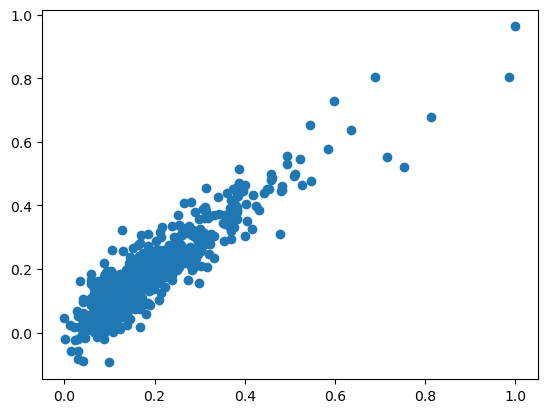

In [69]:
#Scatter plot of actual and train set predictions using Linear Regression
plt.scatter(y_train,y_train_pred)
plt.show()

##### Linear Model Evaluation on test set



In [70]:
#Predict using Linear Regression
y_test_pred=lr.predict(x_test)

In [71]:
# R-Square value of test set
r2_score(y_test,y_test_pred)

-3.8475622484582225e+23

In [72]:
# MSR value on test set
mean_squared_error(y_test,y_test_pred)

6.026369295188522e+21

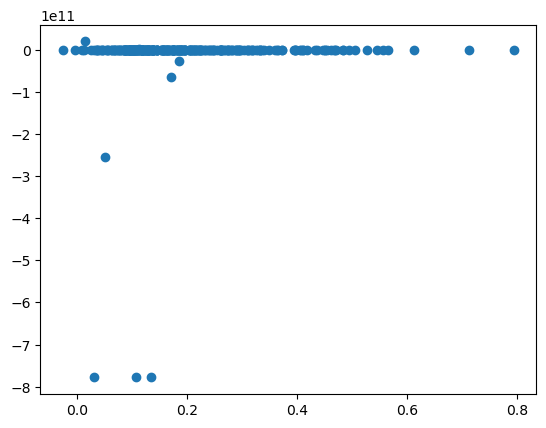

In [73]:
#Scatter plot of actual and test set predictions using Linear Regression
plt.scatter(y_test,y_test_pred)
plt.show()

Observation:

1)R-Square value of train set is 0.81
2)R-Square value of train set is -3.84
3)Therefore, model is clearly overfitting

### Model using Ridge Regression


In [74]:
from sklearn.linear_model import Ridge

In [75]:
#List of lambda values for iteration
lambdas=[0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [76]:
# Iterate Ridge model to find optimum lambda value
for lam in lambdas:
    ridge=Ridge(alpha=lam)
    ridge.fit(x_train, y_train)
    y_train_pred=ridge.predict(x_train)
    print(lam,'------',r2_score(y_train, y_train_pred))

0 ------ 0.9432588704638466
0.001 ------ 0.9450338142511622
0.01 ------ 0.9439110907981735
0.1 ------ 0.9290284216214267
1 ------ 0.9009202623919397
10 ------ 0.8586550495505845
100 ------ 0.7255181068708048
1000 ------ 0.4385371093798882


Observation: Optimal lambda value using Ridge regression is 0.001

In [77]:
# Build final Ridge model using lambda=0.001
ridge=Ridge(alpha=0.001)
ridge.fit(x_train, y_train)

Ridge(alpha=0.001)

In [78]:
# Print the coefficients and intercept
print(ridge.intercept_)
print(ridge.coef_)

-1.2633883018590684
[ 4.55909597e-02  1.46795657e-01  5.79888758e-02  7.38669168e-02
 -6.52390851e-02  3.33521954e-01 -8.89939039e-02  6.17950416e-01
  1.66561911e-02 -3.21678446e-02 -6.35941763e-02 -1.79605277e-02
  2.46674991e-02 -2.69419830e-03 -8.44137379e-02  1.76751156e-03
  0.00000000e+00 -6.20573602e-03  9.33420096e-03  1.64609937e-02
  2.79249848e-03 -3.69452610e-02 -3.38785310e-03  1.99910472e-02
 -1.58195893e-02 -1.04378642e-02 -6.55387826e-03  1.29251814e-02
 -1.43638853e-03  4.44334949e-02  3.42150998e-02  2.81152052e-02
  2.49940119e-02  8.48097084e-02  2.52645210e-03 -1.02503264e-02
 -5.26301723e-06 -9.29364933e-03 -9.18988072e-02 -2.14709298e-02
  1.79004635e-02 -1.59959615e-02 -2.16209004e-02 -8.40145547e-04
  3.51938713e-03 -9.73009965e-02  1.79817657e-02  1.33957886e-02
  1.30316714e-02 -2.17574942e-02 -5.82823001e-03  2.47209338e-02
 -1.21826369e-02 -1.91147139e-02  3.94593101e-03  6.11448193e-03
 -2.18298495e-02 -6.45385020e-03  1.88650444e-02 -2.41627724e-02
  4.5

In [79]:
#Predict using Ridge Regression on train set
y_train_pred=ridge.predict(x_train)

In [80]:
#R-Square value of train set
r2_score(y_train, y_train_pred)

0.9450338142511622

In [81]:
#MSR value of train set
mean_squared_error(y_train, y_train_pred)

0.0007717843713164361

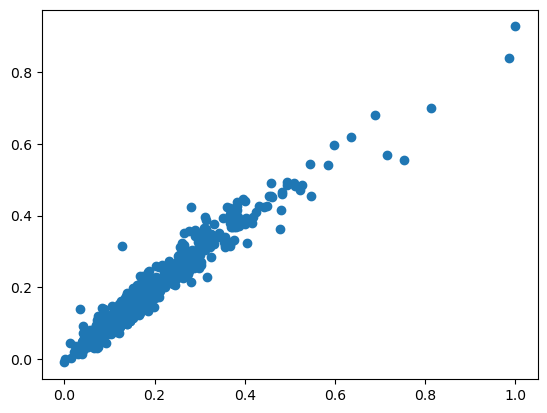

In [82]:
#Scatter plot of actual and train set predictions using Ridge Regression
plt.scatter(y_train, y_train_pred)
plt.show()

Ridge Model Evaluation on test set



In [83]:
#Predict using Ridge Regression on test set
y_test_pred=ridge.predict(x_test)

In [84]:
#R-Square value on test set
r2_score(y_test, y_test_pred)

0.5248199890916903

In [85]:
#MSR value on test set
mean_squared_error(y_test, y_test_pred)

0.007442661203396197

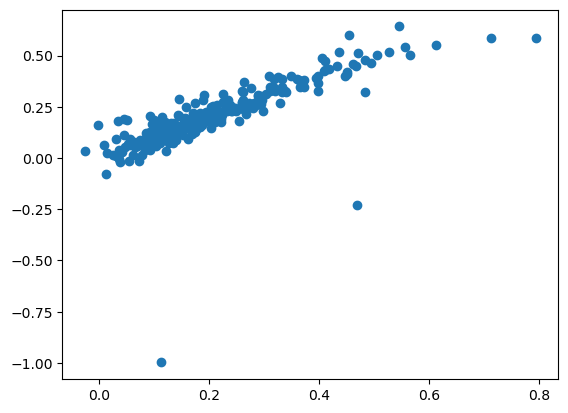

In [86]:
#Scatter plot of actual and test set predictions using Ridge Regression
plt.scatter(y_test, y_test_pred)
plt.show()

Observation:

R-Square value of train set is 0.94
R-Square value of train set is 0.52
Therefore, it is a good model

## Model using Lasso Regression


In [87]:
from sklearn.linear_model import Lasso

In [88]:
# Iterate Lasso model to find optimum lambda value
for lam in lambdas:
    lasso=Lasso(alpha=lam)
    lasso.fit(x_train, y_train)
    y_train_pred=lasso.predict(x_train)
    print(lam,'------',r2_score(y_train, y_train_pred))

0 ------ 0.9450505592133092
0.001 ------ 0.8075776530653146
0.01 ------ 0.4104906102382043
0.1 ------ 0.0
1 ------ 0.0
10 ------ 0.0
100 ------ 0.0
1000 ------ 0.0


Observation:
- Model has high R-Square at lambda=0. 
- But Lasso cannot do feature selection at lambda=0 as penalty term becomes zero.
- Therefore choose lambda=0.001 with decent R-Square value that can help us in feature selection by shrinking insignificant coefficients to 0. 

In [89]:
# Build final Lasso model using lambda=0.001
lasso=Lasso(alpha=0.001)
lasso.fit(x_train, y_train)

Lasso(alpha=0.001)

In [90]:
# Print the coefficients and intercept
print(lasso.intercept_)
print(lasso.coef_)

0.07981978141869826
[ 0.          0.          0.18813526  0.01030247 -0.          0.
  0.          0.12064814  0.0281103   0.         -0.          0.04999521
  0.05483146  0.         -0.         -0.          0.         -0.
  0.          0.00379084 -0.          0.         -0.         -0.
 -0.         -0.         -0.00904952 -0.         -0.          0.
 -0.          0.00046377 -0.01275738  0.          0.         -0.
 -0.00676203  0.         -0.          0.          0.02278199 -0.
 -0.         -0.          0.         -0.         -0.         -0.
  0.          0.         -0.          0.01185074 -0.01155286 -0.
  0.         -0.         -0.         -0.         -0.         -0.
  0.07848672  0.01981748 -0.         -0.          0.         -0.
  0.          0.03329375 -0.          0.         -0.          0.00755411
 -0.         -0.          0.          0.          0.         -0.
 -0.          0.          0.         -0.          0.         -0.
 -0.         -0.         -0.00447232 -0.          0.00

In [91]:
#Predict using Lasso Regression on train set
y_train_pred=lasso.predict(x_train)

In [92]:
#R_Square value of train set
r2_score(y_train, y_train_pred)

0.8075776530653146

In [93]:
##MSR value of train set
mean_squared_error(y_test, y_test_pred)

0.007442661203396197

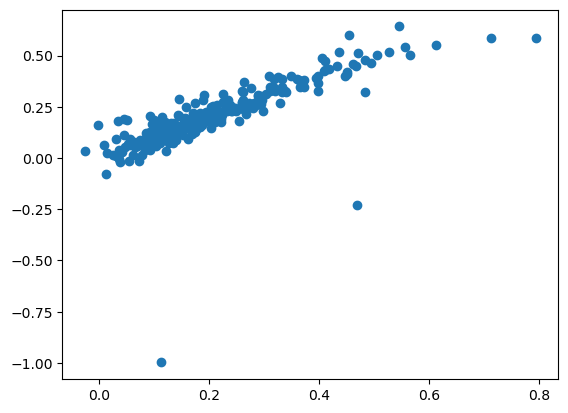

In [94]:
#Scatter plot of actual and train set predictions using Lasso Regression
plt.scatter(y_test, y_test_pred)
plt.show()

In [95]:
#Predict using Lasso Regression on test set
y_test_pred=lasso.predict(x_test)

In [96]:
#R_Square value of test set
r2_score(y_test, y_test_pred)

0.851229062582491

In [97]:
#MSR value of test set
mean_squared_error(y_test, y_test_pred)

0.002330173110593728

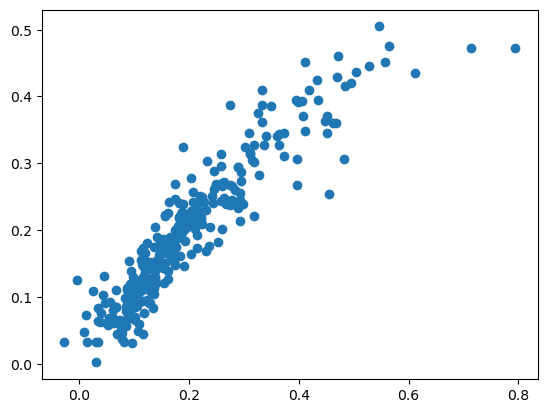

In [98]:
#Scatter plot of actual and test set predictions using Lasso Regression
plt.scatter(y_test, y_test_pred)
plt.show()

Observation:

- R-Square value of train set is 0.80
- R-Square value of train set is 0.85
- Therefore, it is a good model

### Feature selection using Lasso

In [99]:
# List of Non-Zero coefficients
lasso.coef_[lasso.coef_>0]

array([0.18813526, 0.01030247, 0.12064814, 0.0281103 , 0.04999521,
       0.05483146, 0.00379084, 0.00046377, 0.02278199, 0.01185074,
       0.07848672, 0.01981748, 0.03329375, 0.00755411, 0.00263583,
       0.00158789, 0.00293251, 0.02939608, 0.00766695, 0.00515116,
       0.00053891, 0.0148509 ])

In [100]:
# Lasso model selected 19 out of 219 variables
len(lasso.coef_[lasso.coef_>0])

22

In [101]:
# List of significant variables selected by Lasso model
df_train.columns[lasso.coef_>0]

Index(['OverallQual', 'OverallCond', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'GarageCars', 'MSSubClass_60', 'MSZoning_RL', 'LotConfig_CulDSac',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Condition1_Norm', 'HouseStyle_1Story',
       'RoofStyle_Hip', 'Exterior1st_CemntBd', 'BsmtExposure_Gd',
       'BsmtFinType1_GLQ', 'CentralAir_Y', 'Electrical_SBrkr', 'SaleType_New'],
      dtype='object')

## Conclusion after Regularization

- Linear regression suffered with overfitting problem.
- Ridge regression gave good performance but suffered with high dimensionality problem.
- Lasso regression gave decent performance but efficiently addressed high dimensionality problem.

In [102]:
#Create dataframe with coefficients
betas = pd.DataFrame(index=df_train.columns)

In [103]:
betas['Linear'] = lr.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [104]:
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
LotFrontage,4.699476e-02,0.045591,0.000000
LotArea,1.769620e-01,0.146796,0.000000
OverallQual,1.591017e-01,0.057989,0.188135
OverallCond,1.131651e-01,0.073867,0.010302
BsmtUnfSF,-8.786348e-02,-0.065239,-0.000000
TotalBsmtSF,9.124913e-01,0.333522,0.000000
1stFlrSF,-2.875309e-01,-0.088994,0.000000
GrLivArea,5.228751e-01,0.617950,0.120648
FullBath,-3.293385e-03,0.016656,0.028110
BedroomAbvGr,-1.916901e-02,-0.032168,0.000000


----------------------------------------------------------------------------------------------------------------------------

##### Inferences for 'Surprise Housing'

In [108]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

RoofMatl_Membran        1.269962
RoofMatl_WdShngl        1.176232
RoofMatl_WdShake        1.130011
RoofMatl_Tar&Grv        1.079678
RoofMatl_CompShg        1.069201
GrLivArea               0.617950
TotalBsmtSF             0.333522
LotArea                 0.146796
GarageCond_Po           0.110072
SaleCondition_Alloca    0.094989
Name: Ridge, dtype: float64

In [109]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

RoofMatl_Membran        3.560717
RoofMatl_WdShngl        3.242135
RoofMatl_WdShake        3.095689
RoofMatl_Tar&Grv        2.943730
RoofMatl_CompShg        2.913052
GrLivArea               1.855122
TotalBsmtSF             1.395876
LotArea                 1.158117
GarageCond_Po           1.116358
SaleCondition_Alloca    1.099647
Name: Ridge, dtype: float64

In [110]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual             0.188135
GrLivArea               0.120648
Neighborhood_NoRidge    0.078487
GarageCars              0.054831
TotRmsAbvGrd            0.049995
Neighborhood_StoneBr    0.033294
BsmtExposure_Gd         0.029396
FullBath                0.028110
LotConfig_CulDSac       0.022782
Neighborhood_NridgHt    0.019817
Name: Lasso, dtype: float64

In [111]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual             1.206997
GrLivArea               1.128228
Neighborhood_NoRidge    1.081649
GarageCars              1.056363
TotRmsAbvGrd            1.051266
Neighborhood_StoneBr    1.033854
BsmtExposure_Gd         1.029832
FullBath                1.028509
LotConfig_CulDSac       1.023043
Neighborhood_NridgHt    1.020015
Name: Lasso, dtype: float64